<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Session 5)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [ ]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import function to perform linear regression using OLS
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

#### Read the data

Load the csv file and print the first five observations.

In [ ]:
# load the csv file
# store the data in 'df_fish'
df_fish = pd.read_csv('Fish.csv')

# display the first five observations using head()
df_fish.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# consider the independent variables
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_fish.select_dtypes(include = np.number).drop(["Weight"], axis = 1)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_cat = df_fish.select_dtypes(include = "object")

Dummy encode the categorical variables.

In [ ]:
# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first = True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_cat, drop_first = True)

Before building the model, we scale the numerical variables such that each variable will have mean = 0, and variance = 1.

In [ ]:
# initialize the standard scalar
num_scaler = StandardScaler()

# standardize all the columns of the dataframe 'df_num'
num_scaled = num_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the reqired column names to the parameter, 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

# consider the target variable
df_target = df_fish['Weight']

# standardize the target variable explicitly 
y = (df_target - df_target.mean()) / df_target.std()

In [ ]:
# concatenate the scaled numerical and dummy encoded variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num_scaled, dummy_variables],axis=1)

In [ ]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_full_model = linreg.fit(X_train, y_train)

# predict the values of target variable using train data
y_train_pred = MLR_full_model.predict(X_train)

# compute RMSE on train data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
print('RMSE on train set:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

# predict the values of target variable using test data
y_test_pred = MLR_full_model.predict(X_test)

# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
print('RMSE on test set:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE on train set: 0.20395384990255652
RMSE on test set: 0.4772823585819712


We can see that there is difference in the RMSE of the train and the test set. This implies that our model has overfitted on the train set.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the train and test set obtained in Q1.

In [ ]:
# fit a model with an intercept using fit()
# add_constant(): adds the intercept term to the model
MLR_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     169.5
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           4.91e-59
Time:                        14:58:12   Log-Likelihood:                 18.972
No. Observations:                 111   AIC:                            -13.94
Df Residuals:                      99   BIC:                             18.57
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4840      0.23

The 'Cond. No' (= 178) represents the `Condition Number (CN)` which is used to check the multicollinearity. 

If CN < 100: no multicollinearity<br>
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is moderate multicollinearity in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

We use `Ridge Regression` whenever the multicollinearity is present in the data. Use the train and test data obtained in Q1.

In [ ]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
ridge = Ridge(alpha = 1.5)

# fit the model on train set using fit()
ridge_model = ridge.fit(X_train, y_train)

# predict the values of target variable using test data
y_test_pred = ridge_model.predict(X_test)

# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
print('RMSE on test set:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE on test set: 0.4370696657072342


We can see that the RMSE on the test set (=0.4371) obtained from ridge regression is less than the RMSE on the test set (=0.4773) obtained from linear regression using OLS.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the train and test data obtained in Q1.

In [ ]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

Now, plot a multiple barchart to compare the coefficients obtained from the SGD model and the full model using OLS (consider the full model build in Q1).

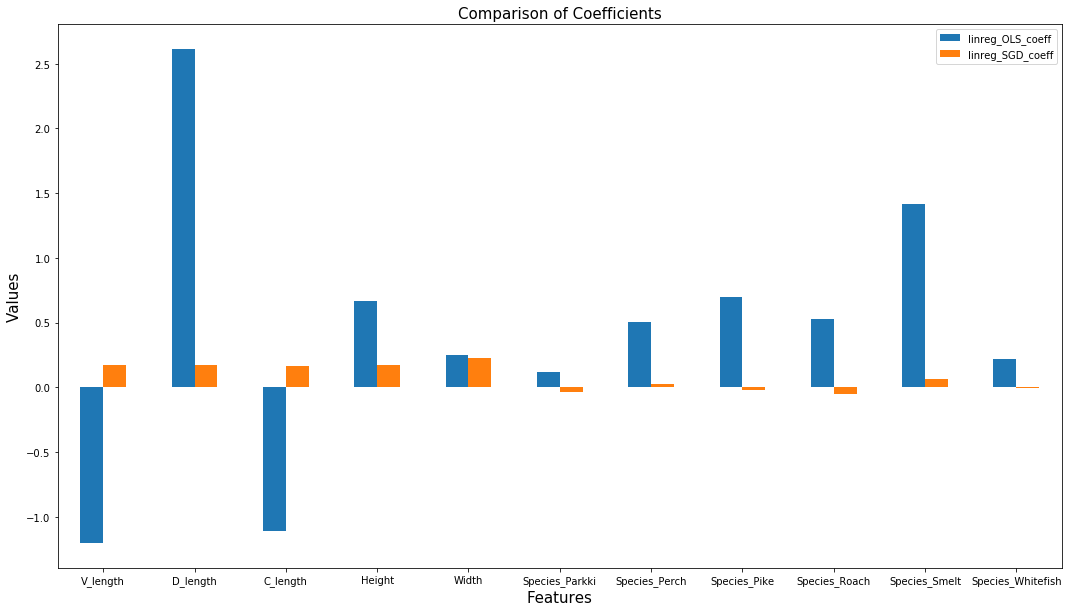

In [ ]:
# create a dataframe containing the beta coefficients for the linear regression models build using OLS and SGD 
# 'coef_' returns the value of each coefficient
# pass the required column names to the parameter, 'columns'
# pass the row indexes to the parameter, 'index'
df_coeff = pd.DataFrame([MLR_full_model.coef_, linreg_with_SGD.coef_], columns = X.columns, 
                 index = ['linreg_OLS_coeff', 'linreg_SGD_coeff'])

# plot a side by side bar graph
# 'T' returns the transposed dataframe 
# set figure size using 'figsize'
fig = df_coeff.T.plot.bar( figsize=(18,10))

# set axes and plot labels
# set the text size using 'fontsize'
plt.title('Comparison of Coefficients', fontsize = 15)
fig.set_xlabel('Features', fontsize = 15)
fig.set_ylabel('Values', fontsize = 15)

# set the x-axis labels horizontally
plt.xticks(rotation = 'horizontal')

# set the position of legend
fig.legend(loc='upper right')

# display the plot
plt.show()

We can observe that the coefficients obtained from the SGD model have smaller values as compared to the values obtained from the linear regression model using OLS.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

We use `Lasso Regression` with 'alpha = 0.1' to identify the least significant variables. Use the train and test data obtained in Q1.

In [ ]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
lasso = Lasso(alpha = 0.1)

# fit the model on train set using fit()
lasso_model = lasso.fit(X_train, y_train)

The least significant variable will be the one with zero coefficient value.

In [ ]:
# create a dataframe to store the variable names and their corresponding coefficient values
# pass the dictionary as data to the dataframe
# 'coef_' returns the value of each coefficient
df_lasso_coeff = pd.DataFrame(data = {'Variable': X.columns, 'Coefficient': lasso_model.coef_})

# print the variables having the coefficient equal to zero
# 'to_list()' converts the output to the list type
print('Least significant variables obtained from Lasso Regression when alpha is 0.1:')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Least significant variables obtained from Lasso Regression when alpha is 0.1:


['D_length',
 'C_length',
 'Species_Parkki',
 'Species_Perch',
 'Species_Pike',
 'Species_Roach',
 'Species_Smelt',
 'Species_Whitefish']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the train and test data obtained in Q1.

In [ ]:
# consider the variable 'Width' from 'X_train'
X_train_width = X_train['Width']

# fit a model with an intercept using fit()
# add_constant(): adds the intercept term to the model
MLR_full = sm.OLS(y_train, sm.add_constant(X_train_width)).fit()

# print the summary output
print(MLR_full.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     597.7
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           4.73e-46
Time:                        14:58:13   Log-Likelihood:                -43.084
No. Observations:                 111   AIC:                             90.17
Df Residuals:                     109   BIC:                             95.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0181      0.034     -0.528      0.5

Considering only the width, we see that the variable contributes to 84.6% of variation in the weight of a fish. 

Interpretation of β coefficients:

β<sub>const</sub> = -0.0181, represents the weight of a fish considering the width to be 0  <br>

β<sub>Width</sub> = 0.8209, it implies that 0.8209 is the average increase in the weight of a fish due to one unit increase in the width.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [ ]:
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[0.00001, 0.001, 0.1, 10, 100]}]
 
# instantiate the Ridge() method
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
ridge_grid = GridSearchCV(estimator = ridge, param_grid = tuned_paramaters, cv = 5)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameter
print('Best parameter for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameter for Ridge Regression:  {'alpha': 1e-05} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [ ]:
# create a dictionary with hyperparameters and its values
# 'l1_ratio' is the elastic net mixing parameter
tuned_paramaters = [{'l1_ratio':[0.0001, 0.001, 0.01, 0.1, 1]}]

# instantiate the ElasticNet() method
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
enet_grid = GridSearchCV(estimator = enet, param_grid = tuned_paramaters, cv = 5)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameter for Elastic Net Regression: ', enet_grid.best_params_, '\n')

Best parameter for Elastic Net Regression:  {'l1_ratio': 0.0001} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [ ]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.1, 1, 2, 3]}]
                     
# instantiate the lasso() method
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
lasso_grid = GridSearchCV(estimator = lasso, param_grid = tuned_paramaters, cv = 5)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameter for Lasso Regression: ', lasso_grid.best_params_, '\n')

Best parameter for Lasso Regression:  {'alpha': 0.0001} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'enet_grid' is the elastic net model using GridSearchCV
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
enet = ElasticNet(alpha = 0.1, l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# fit the model on train data using fit()
enet_model = enet.fit(X_train, y_train)

# predict the values of target variable using test data
y_test_pred = enet_model.predict(X_test)

# compute RMSE on test data
# take the square root of the MSE 
# calculate MSE using 'mean_squared_error()'
print('RMSE on test set:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE on test set: 0.451691286383252
